L1= 0.2
T= 0.003799671038392666
Критерій, що забезпечує хороше наближення (>>1): 1.688


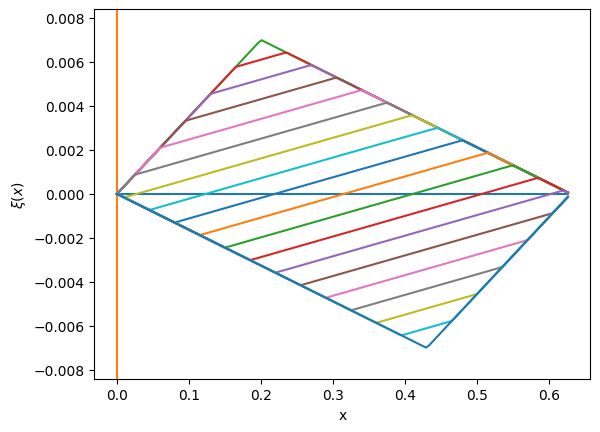

In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt

def fi(xx):
    if xx<L1:
        yk=fi_m*xx/L1
    else:
        yk=fi_m*(L-xx)/(L-L1)
    return yk

def ak(xx,yt):
    k_max=200
    s=0
    for k in range(1,k_max):
        r=pi*k/L
        Ak=2*fi_m*math.sin(r*L1)/(L1*(L-L1)*r**2)
        s=s+Ak*math.sin(r*xx)*math.cos(r*yt*q**0.5)
    return s

def psi(x):
    return 0
# АНАЛІТИЧНИЙ РОЗВ'ЯЗОК
# функція початкового зміщення - f(x)={h1x/L1, 0<xL1; h1(L–x)/(L–L1), L1<x<L)}

# t<<h/(q^0.5)
fi_m=0.007
F=96
M=0.00495
L=0.63
L1=round(0.3*L,1)
print('L1=',L1)
q=F*L/M
T=2*L/(3*q**0.5)
print('T=',T)
n=160
m=180
h=L/n
t=T/m
p=h**2/(q*t**2)
krok_t=15  # t*krok_t - різниця в часі між зображеними графіками
print('Критерій, що забезпечує хороше наближення (>>1):',round((h/q**0.5)/t,3))
pi=math.pi
m=280

x=[h*k for k in range(0,n)]
y=[t*k for k in range(0,m)]
        
kx=[[0]*(n) for k in range(m)]
for j in range(m):
    for i in range(n):
        kx[j][i]=ak(x[i],y[j])

#побудова графіків
fig1=plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
yox=[0]*len(x)
xoy=[0,0,0]
yoy=[-1.2*fi_m,0,1.2*fi_m]
plt.ylim([-1.2*fi_m,1.2*fi_m])
ax1.plot(x,yox)
ax1.plot(xoy,yoy)
ax1.set_xlabel('x', fontsize=10)
ax1.set_ylabel(r'$\xi(x)$', fontsize=10)

for k in range(0,m,krok_t):
    ax1.plot(x,kx[k])

# plt.axis('equal')
plt.show()